In [78]:
import pandas as pd
import numpy as np
from scipy.stats import kstest, ks_2samp, t, normaltest, norm
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [6]:
X_train = pd.read_csv("https://raw.githubusercontent.com/erdemsirel/ds555_hw3_scoring/master/X_train.csv")
X_test = pd.read_csv("https://raw.githubusercontent.com/erdemsirel/ds555_hw3_scoring/master/X_test.csv")

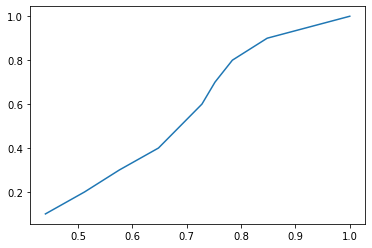

In [67]:
s = X_train.mpg
cdf=s.value_counts().sort_index().cumsum() / s.shape[0]
cdf = [cdf[cdf<=i].count()/cdf.count() for i in np.arange(0.1, 1.1,0.1)]
plt.plot(cdf, np.arange(0.1, 1.1,0.1))

In [79]:
normaltest(s)

NormaltestResult(statistic=7524.321635067164, pvalue=0.0)

In [84]:
ref = X_train.describe().T
ref['mean']

carID         15832.446169
year           2016.737903
mileage       24956.286895
tax             152.332661
mpg              50.370766
engineSize        2.124375
Name: mean, dtype: float64

In [12]:
ks_2samp(X_train.mileage, X_test.mileage)


KstestResult(statistic=0.020833735754297856, pvalue=0.43076170727755936)

In [68]:
kstest(X_test.mpg, cdf=cdf)

KstestResult(statistic=1.0, pvalue=0.0)

In [87]:
np.abs(X_test.mean().rename("mean") / ref['mean'] - 1)

carID         0.003057
year          0.000009
mileage       0.013574
tax           0.006098
mpg           0.011584
engineSize    0.005051
Name: mean, dtype: float64

In [69]:
def test_mean(mean, ref_mean, ref_std, z_threshold=3):
    return mean < ref_mean + ref_std*z_threshold and mean > ref_mean - ref_std*z_threshold

